### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
- [Importing libraries](#1)
- [Data Wrangle](#2)
- [Answering Questions](#3)

# Styling headlines

In [83]:
%%html
<style>
h1 {
  color: black ;
  background-color: lightpink;
  text-align: center;
  border: 1px solid black;
  transition: color 1s ease-in-out;
  transition: background-color 1s ease-in-out;  
}

h1:hover {
  color: cyan   ;
  background-color: black ;
}
h2 {
    color: Crimson;
    border: 1px solid black;
    background-color: PaleTurquoise;
    text-align: center;
    transition: background-color 1s ease-in-out;
}
h2:hover {
  background-color: LightGreen   ;
</style>

<h1>Importing Libraries </h1>

In [73]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

## loading and exploring the data

In [2]:
df = pd.read_csv("sales_data.csv")

In [3]:
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


In [5]:
df.describe()

,price,quantity,revenue
count,367.000000,368.000000,368.000000
mean,211.226158,14.565217,2060.679348
std,227.335170,8.595740,1910.930790
min,20.000000,3.000000,300.000000
25%,50.000000,8.000000,800.000000
50%,100.000000,12.000000,1200.000000
75%,300.000000,20.000000,2400.000000
max,1200.000000,50.000000,7200.000000




<h1>Data Cleaning</h1>

## WIll fix the data type for date column and solve null issue

In [8]:
# Change data types
df['date'] = df['date'].astype('datetime64')

In [9]:
# Fill in missing values
df['date'].fillna(pd.to_datetime('2023-08-01'), inplace=True)
df['price'].fillna(0, inplace=True)
df['quantity'].fillna(0, inplace=True)
df['revenue'].fillna(0, inplace=True)


#### Another check before We start our analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      369 non-null    datetime64[ns]
 1   product   369 non-null    object        
 2   category  369 non-null    object        
 3   price     369 non-null    float64       
 4   quantity  369 non-null    float64       
 5   revenue   369 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 17.4+ KB


In [11]:
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


# **Assessment Questions**


<ol>
  <li><b>What was the total revenue generated by the company over the course of the year?</b></li>
  <li><b>Which product had the highest revenue? How much revenue did it generate?</b></li>
  <li><b>What was the average price of a product sold by the company?</b></li>
  <li><b>What was the total quantity of products sold by the company?</b></li>
  <li><b>Which category had the highest revenue? How much revenue did it generate?</b></li>
  <li><b>What was the average revenue per sale?</b></li>
  <li><b>What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)</b></li>
</ol>


<h2>1-What was the total revenue generated by the company over the course of the year?</h2>

In [85]:
total_revenue = df["revenue"].sum()
total_revenue



758330.0

<h2>2- Which product had the highest revenue? How much revenue did it generate?</h2>

In [94]:
max_revenue_product = df.groupby("product")["revenue"].max().sort_values(ascending=False).index[0]
max_revenue = df[df["product"] == max_revenue_product]["revenue"].sum()

print("The higest revenue product is:  " + max_revenue_product+", with Revenue of: "+ str(max_revenue)+ "$")

The higest revenue product is:  Smartphone, with Revenue of: 434400.0$


<h2>3- What was the average price of a product sold by the company?</h2>

In [139]:
average_prices_per_product = df.groupby('product').agg(average_pricez=('price', np.mean)).sort_values(by='average_pricez', ascending=False).reset_index()
round(average_prices_per_product)


,product,average_pricez
0,Laptop,1200.0
1,Smartphone,600.0
2,Tablet,400.0
3,Smartwatch,200.0
4,Watch,143.0
5,Coat,100.0
6,Headphones,100.0
7,Sneakers,80.0
8,Speaker,80.0
9,Backpack,50.0


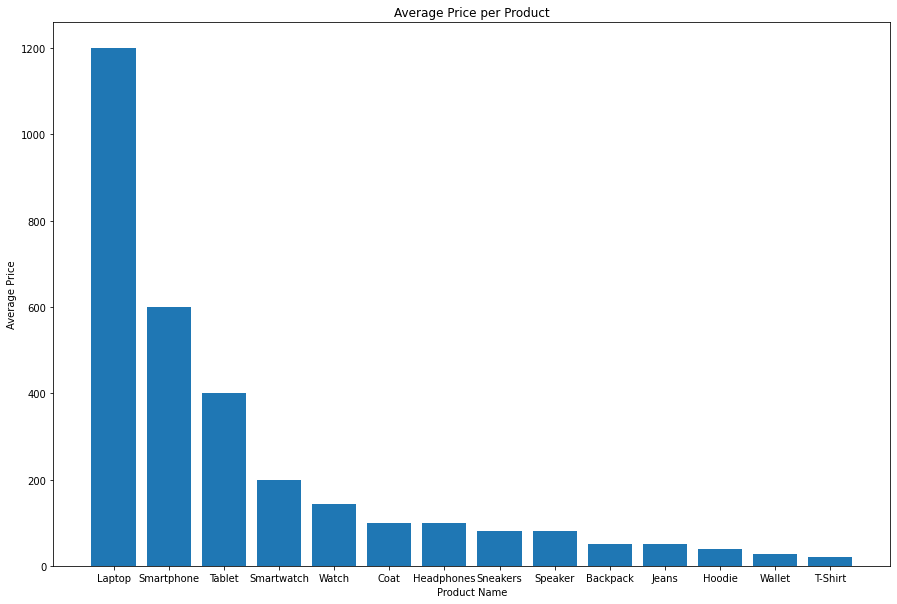

In [126]:
product_names = average_prices_per_product['product'].to_numpy()
average_prices = average_prices_per_product['average_pricez'].to_numpy()

plt.figure(figsize=(15, 10))
plt.bar(product_names, average_prices)
plt.xlabel("Product Name")
plt.ylabel("Average Price")
plt.title("Average Price per Product")
plt.show()

<h2>4- What was the total quantity of products sold by the company?</h2>

In [123]:
# Total quantity of products sold by the company
total_quantity = df["quantity"].sum()
print("total_quantity:  " + str(total_quantity))

total_quantity:  5360.0


<h2>5-  Which category had the highest revenue? How much revenue did it generate?</h2>

In [131]:
# Category with the highest revenue
max_revenue_category = df.groupby("category")["revenue"].max().sort_values(ascending=False).index[0]
max_revenue_category_revenue = df[df["category"] == max_revenue_category]["revenue"].sum()
print(max_revenue_category +"   " +str(max_revenue_category_revenue))


Electronics   516080.0


<h2>6-  What was the average revenue per sale?


In [143]:
average_revenue_per_sale = df["revenue"].mean()
round(average_revenue_per_sale,3)

2055.095

<h2>7- What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)

In [153]:


df["quarter"] = pd.to_datetime(df["date"]).dt.quarter

quarterly_revenue = df.groupby("quarter")["revenue"].sum()

quarter_names = ["Q1", "Q2", "Q3", "Q4"]

quarterly_revenue_by_name = {}
for quarter, revenue in quarterly_revenue.items():
  quarter_name = quarter_names[quarter - 1]
  quarterly_revenue_by_name[quarter_name] = revenue

print("Total revenue generated in each quarter of the year:")
for quarter, revenue in quarterly_revenue_by_name.items():
  print(quarter, ":", revenue)


Total revenue generated in each quarter of the year:
Q1 : 182100.0
Q2 : 183970.0
Q3 : 197680.0
Q4 : 194580.0


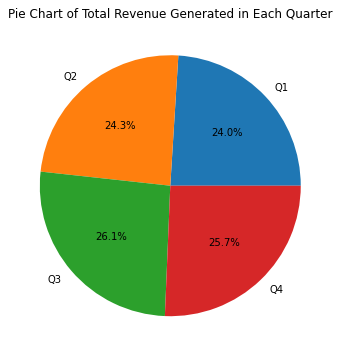

In [159]:
plt.figure(figsize=(8, 6))

plt.pie(
    quarterly_revenue_by_name.values(),
    labels=quarterly_revenue_by_name.keys(),
    autopct="%1.1f%%",
)
plt.title("Pie Chart of Total Revenue Generated in Each Quarter")
plt.show()


### Thanks for viewing My report I hope you injoyed it and found it insightfull

### By: Mohamed A. Hassan © 2023 
###  mohamadhassan2050@yahoo.com | (+20) 01140313695 | (+20) 01062112940 | https://www.linkedin.com/in/mohamadahassan1 | https://github.com/mohamadahassan1